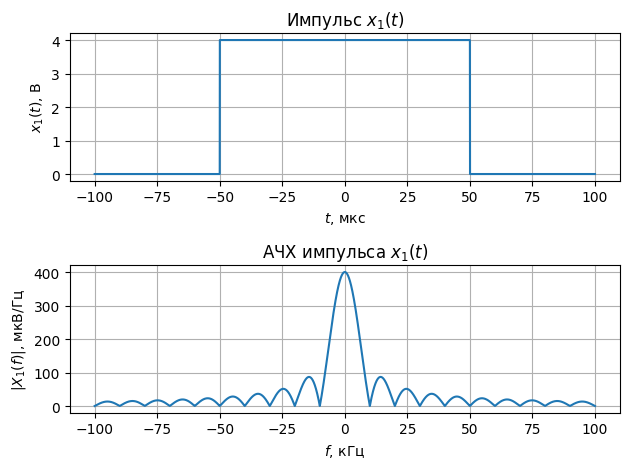

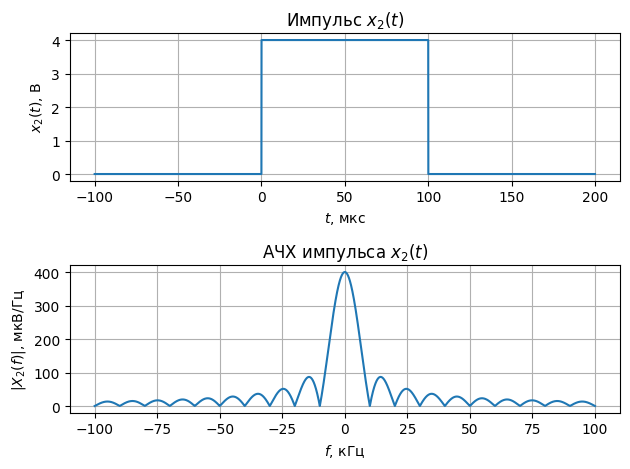

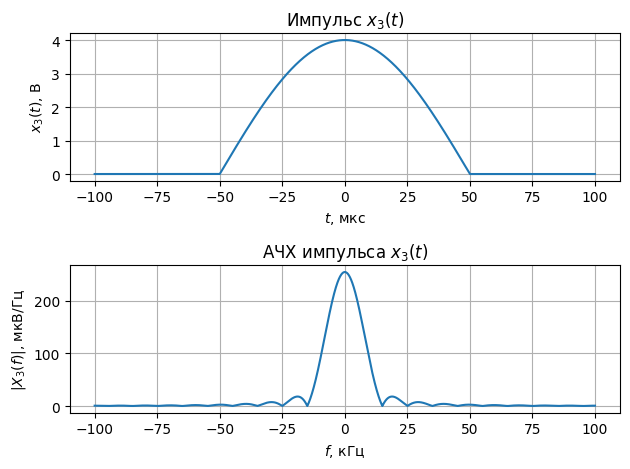

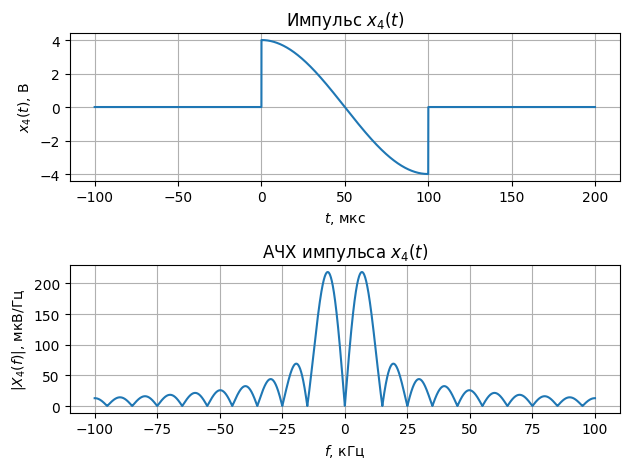

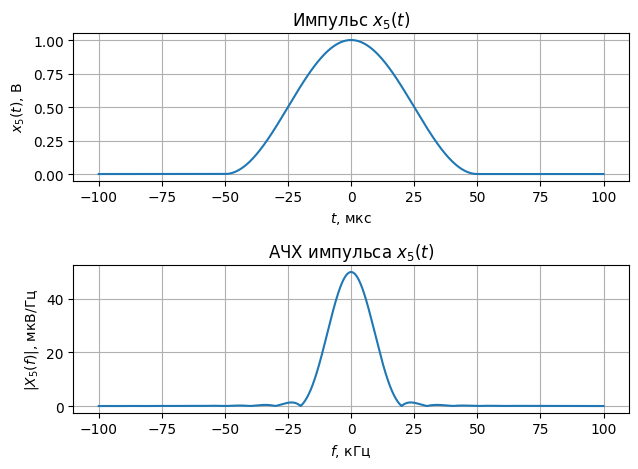

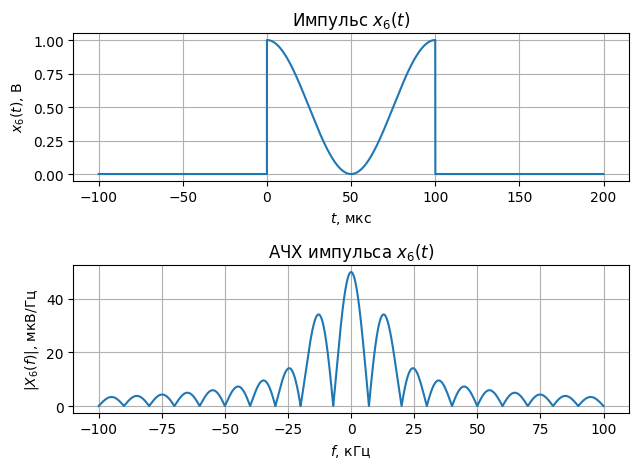

In [4]:
import numpy as np
import matplotlib.pyplot as plt

tau=100e-6
E=4

def sinc(x):
    return np.sin(x) / x if x != 0 else 1

def x_1(t, E, tau):
    return E if np.abs(t) < tau / 2 else 0.0

def X_1(f, E, tau):
    return E * tau * sinc(np.pi * f * tau)

def x_2(t, E, tau):
    return E if 0 <= t <= tau else 0.0

def X_2(f, E, tau):
    return E * tau * sinc(np.pi * f * tau) * np.exp(-1.j * np.pi * f * tau)

def x_3(t, E, tau):
    return E * np.cos(np.pi * t / tau) if np.abs(t) < tau / 2 else 0.0

def X_3(f, E, tau):
    # return (E * tau / 2) * (sinc(np.pi / 2 - np.pi * f * tau) + sinc(np.pi / 2 + np.pi * f * tau)) 
    return (X_1(f + 1 / (2 * tau), E, tau) + X_1(f - 1 / (2 * tau), E, tau)) / 2

def x_4(t, E, tau):
    return E * np.cos(np.pi * t / tau) if 0 <= t <= tau else 0.0

def X_4(f, E, tau):
    # return 4 * f * tau**2 * E * np.cos(np.pi * f * tau) / (np.pi * (4 * f**2 * tau**2 - 1))
    return (X_2(f + 1 / (2 * tau), E, tau) + X_2(f - 1 / (2 * tau), E, tau)) / 2

def x_5(t, E, tau):
    return (1 + np.cos(2 * np.pi * t / tau)) / 2 if np.abs(t) < tau / 2 else 0.0

def X_5(f, E, tau):
    return X_1(f, 1, tau) / 2 + (X_1(f + 1 / (tau), 1, tau) + X_1(f - 1 / (tau), 1, tau)) / 4
    # return (tau / 2) * sinc(np.pi * f * tau) * 1 / (1 - tau**2 * f**2)

def x_6(t, E, tau):
    return (1 + np.cos(2 * np.pi * t / tau)) / 2 if 0 <= t <= tau else 0.0

def X_6(f, E, tau):
    return X_2(f, 1, tau) / 2 + (X_2(f + 1 / (tau), 1, tau) + X_2(f - 1 / (tau), 1, tau)) / 4
    # return X_2(f, E, tau) / 2 + (X_2(f + 2 / (tau), E, tau) + X_2(f - 2 / (tau), E, tau)) / 4
    # return (2 * (f * tau)**2 - 1) * np.sin(np.pi * f * tau) / ((f * tau)**2 - 1) / (2 * np.pi * f)

def get_spectrum(f, freq, t_min, t_max):
    x = np.linspace(t_min, t_max, 2**8)
    int_func = np.vectorize(lambda t: f(t, E, tau) * np.exp(-1.j * 2 * np.pi * freq * t))
    return np.trapezoid(int_func(x), x)

f_band = np.linspace(-10/tau, 10/tau, num=2**14)

signals = [x_1, x_2, x_3, x_4, x_5, x_6]
spectrums = [X_1, X_2, X_3, X_4, X_5, X_6]

for i in range(6):
    if i % 2 == 0:
        t_band = np.linspace(-tau, tau, num=2**14)
    else:
        t_band = np.linspace(-tau, 2 * tau, num=2**14)
    
    x = np.array([signals[i](t, E, tau) for t in t_band])
    X = np.abs(np.array([spectrums[i](f, E, tau) for f in f_band]))
    
    ComputedSpectrum = not not not not not not not True
    
    if ComputedSpectrum:
        X_comp = np.abs(np.array([get_spectrum(signals[i], f, -tau, 2 * tau) for f in f_band]))
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t_band*1e6, x)
    plt.title(f"Импульс $x_{i+1}(t)$")
    plt.xlabel("$t$, мкc")
    plt.ylabel(f"$x_{i+1}(t)$, В")
    plt.tight_layout()
    plt.grid()
    plt.subplot(2, 1, 2)
    plt.title(f"АЧХ импульса $x_{i+1}(t)$")
    plt.plot(f_band*1e-3, abs(X)*1e6)
    if ComputedSpectrum:
        plt.plot(f_band*1e-3, abs(X_comp)*1e6)
    plt.ylabel(f"$|X_{i+1}(f)|$, мкВ/Гц")
    plt.xlabel("$f$, кГц")
    plt.tight_layout()
    plt.grid()
    plt.show()